<a href="https://colab.research.google.com/github/iam-arshpreet/project-215/blob/main/projeccct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

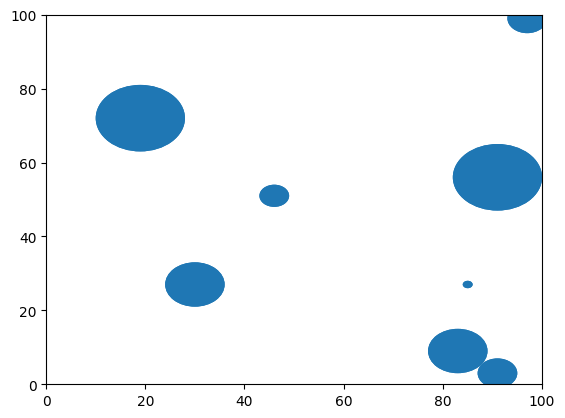

In [2]:
import itertools
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

class Circle:
    ''' represents a circle'''

    def __init__(self, radius:float, color:str, velocity = 0, centre = (0,0)):
        self.centre = centre
        self.radius = radius
        self.velocity = velocity
        self.color = color

    def __str__(self):
         return f'circle is {self.centre},{self.radius},{self.velocity}, {self.color}'

    def motion(self, move_tuple=(0,0)):
        ''' moves the circle by given amount'''
        if move_tuple == (0,0):
            new_centre = (self.centre[0] + int(self.velocity), self.centre[1] + int(self.velocity))
        else:
            new_centre = (self.centre[0] + move_tuple[0], self.centre[1] + move_tuple[1])
        self.centre = new_centre

    def collision_detection(self, other_circle):
        distance_bw_circles = math.sqrt(pow((self.centre[0] - other_circle.centre[0]),2) + pow((self.centre[1] - other_circle.centre[1]),2))
        return distance_bw_circles<(self.radius+other_circle.radius)


class Simulation:
    ''' Manages all the circle objects'''

    def __init__(self, n_circles, steps):
        self.circles = []
        self.n_circles = n_circles
        self.steps = steps
        for i in range(self.n_circles):
            rad = random.randint(0,10)
            cent = (random.randint(0, 100), random.randint(0, 100))
            vel = random.randint(0,5)
            colors = ['red', 'blue', 'green', 'yellow']
            col = colors[random.randint(0,3)]
            self.circles.append(Circle(rad, col, vel, cent))


    def collision(self):
        ''' collision happens'''
        for i in range(self.steps):
            for circle in self.circles:
                circle.motion()
                for circle1, circle2 in itertools.combinations(self.circles, 2):
                    if circle1.collision_detection(circle2):
                        circle1.color = 'black'
                        circle2.color = 'black'

    def animate(self):
        fig, ax = plt.subplots()
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        circles_plot = [plt.Circle(circle.centre, circle.radius, fill= circle.color) for circle in self.circles]

        def init():
            for circle_plot in circles_plot:
                ax.add_patch(circle_plot)
            return circles_plot

        def update(frame):
            self.collision()
            for i in range(len(circles_plot)):
                circles_plot[i].center = self.circles[i].centre
            return circles_plot


        anim = FuncAnimation(fig, update, frames=self.steps, init_func=init, blit=True)
        plt.show()

# Example usage
simulation = Simulation(n_circles=10, steps=100)
simulation.animate()